In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
os.chdir('E:\\MLdataset')

In [4]:
x_5degree = pd.read_csv('x_5degree.csv', header=None)

In [5]:
x_5degree = x_5degree.to_numpy(dtype='float32')

In [6]:
x = x_5degree[:, 0:15]

In [7]:
x = x.reshape(((72*3+1)*6, n_sensors, 1))

In [8]:
y_5degree = pd.read_csv('y_output(5deg).csv', header=None)

In [9]:
os.chdir('C:\\Users\\User')

In [10]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [11]:
y = y_5degree.reshape(((72*3+1)*6, 100, 100))

In [12]:
tsr = x_5degree[:, -2]

In [13]:
theta = x_5degree[:, -1]

In [14]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.3,
                                                                                                 random_state=42)

In [15]:
print(y_train.shape)

(911, 100, 100)


In [16]:
print(y_test.shape)

(391, 100, 100)


In [17]:
print(x_train.shape)

(911, 15, 1)


In [18]:
print(x_test.shape)

(391, 15, 1)


In [19]:
theta_train

array([ 185.,   20.,  725.,  955.,  380.,  895.,  475.,  515.,  520.,
       1075.,  445.,  610., 1040.,  195.,  150.,  125.,  320.,  125.,
        680.,  465.,  630.,  660.,  540.,  325., 1035.,  375.,   15.,
        555.,  265., 1025.,  760.,  485.,   20.,  795.,  680.,  255.,
        485.,  930.,  510.,  895.,  860.,   25.,  500., 1035.,  470.,
        815.,  705.,  130., 1030.,  425.,  820.,  565.,  780.,   50.,
        215.,  915.,  955.,  440.,  330.,  550.,  335., 1080., 1055.,
         60.,  810.,  520.,  410.,  105.,  100.,  420.,  650.,   50.,
         95.,  750.,  280.,  930.,  735.,  655.,  985.,  510., 1080.,
        280.,  395.,  725.,  100.,  540.,  940.,   10.,   30.,  765.,
        470.,  165.,  790.,  740.,  310.,  725., 1075.,  505., 1075.,
        135.,  245.,  850.,  400.,  445.,  250.,  690.,  290., 1050.,
        975.,  685.,  275., 1045.,  195.,  370.,  125.,  595.,  475.,
        235.,  505.,  530.,  375.,  275.,  905., 1065.,  600.,  725.,
        190.,  360.,

In [20]:
tsr_train

array([2. , 1.7, 1.7, 1.8, 2. , 1.9, 1.9, 2. , 1.6, 1.6, 2. , 1.9, 1.6,
       1.5, 1.5, 1.6, 2. , 1.9, 1.5, 1.6, 2. , 1.9, 1.9, 2. , 2. , 2. ,
       1.5, 1.5, 1.8, 2. , 1.8, 1.9, 1.9, 1.6, 1.7, 1.7, 1.6, 1.9, 1.6,
       1.7, 1.8, 1.5, 1.5, 1.6, 1.8, 1.7, 1.7, 1.8, 1.6, 1.9, 2. , 1.8,
       1.7, 1.6, 1.7, 1.7, 2. , 1.7, 1.5, 2. , 1.5, 1.9, 1.5, 1.5, 1.7,
       1.8, 1.6, 1.8, 1.9, 2. , 1.8, 1.8, 1.9, 2. , 1.7, 1.7, 1.8, 2. ,
       1.7, 1.9, 2. , 1.6, 1.7, 1.6, 1.6, 2. , 1.8, 1.5, 1.5, 1.6, 1.6,
       2. , 1.8, 1.7, 1.8, 1.9, 1.5, 1.7, 1.7, 1.5, 2. , 2. , 1.7, 1.7,
       1.9, 1.7, 2. , 1.8, 1.7, 1.6, 2. , 1.7, 1.6, 1.6, 1.5, 1.6, 1.7,
       1.5, 1.6, 1.5, 1.9, 1.5, 1.7, 1.5, 1.5, 1.8, 1.9, 1.5, 1.7, 1.5,
       1.9, 1.8, 1.9, 1.9, 1.7, 1.7, 2. , 1.7, 1.5, 1.5, 1.7, 1.5, 1.6,
       1.6, 1.7, 1.9, 1.7, 1.5, 1.5, 2. , 1.8, 1.5, 1.9, 1.9, 1.7, 1.8,
       1.8, 1.8, 1.7, 1.5, 1.5, 1.9, 1.5, 1.9, 1.7, 1.8, 1.7, 1.5, 1.6,
       1.6, 2. , 1.9, 1.6, 1.5, 1.7, 1.8, 1.9, 1.9, 1.8, 1.8, 2.

In [21]:
os.chdir('C:\\Users\\User')

In [22]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [23]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape (Reshape)           (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             513000

In [24]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [25]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
23/23 [==============================] - 1s 5ms/step - loss: 0.0108 - rmse: 0.1032
Epoch 2/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0103 - rmse: 0.1008
Epoch 3/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0084 - rmse: 0.0909
Epoch 4/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0841
Epoch 5/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0830
Epoch 6/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0809
Epoch 7/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0781
Epoch 8/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0768
Epoch 9/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0761
Epoch 10/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0752
Epoch 11/10000
23/23 [=======

23/23 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0326
Epoch 85/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0322
Epoch 86/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0320
Epoch 87/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0317
Epoch 88/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0314
Epoch 89/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0310
Epoch 90/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0308
Epoch 91/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0306
Epoch 92/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0303
Epoch 93/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0300
Epoch 94/10000
23/23 [=============

23/23 [==============================] - 0s 5ms/step - loss: 4.7598e-04 - rmse: 0.0176
Epoch 165/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7215e-04 - rmse: 0.0174
Epoch 166/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6925e-04 - rmse: 0.0174
Epoch 167/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6613e-04 - rmse: 0.0173
Epoch 168/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6321e-04 - rmse: 0.0172
Epoch 169/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6077e-04 - rmse: 0.0171
Epoch 170/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5759e-04 - rmse: 0.0170
Epoch 171/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5296e-04 - rmse: 0.0169
Epoch 172/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5106e-04 - rmse: 0.0168
Epoch 173/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4591e-04 -

23/23 [==============================] - 0s 5ms/step - loss: 3.0486e-04 - rmse: 0.0120
Epoch 244/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.0405e-04 - rmse: 0.0120
Epoch 245/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.0313e-04 - rmse: 0.0119
Epoch 246/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.0182e-04 - rmse: 0.0119
Epoch 247/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.9981e-04 - rmse: 0.0118
Epoch 248/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.9813e-04 - rmse: 0.0117
Epoch 249/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.9748e-04 - rmse: 0.0117
Epoch 250/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.9624e-04 - rmse: 0.0117
Epoch 251/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.9520e-04 - rmse: 0.0116
Epoch 252/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.9392e-04 -

23/23 [==============================] - 0s 5ms/step - loss: 2.3577e-04 - rmse: 0.0092
Epoch 323/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3468e-04 - rmse: 0.0091
Epoch 324/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3495e-04 - rmse: 0.0091
Epoch 325/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3399e-04 - rmse: 0.0091
Epoch 326/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3285e-04 - rmse: 0.0090
Epoch 327/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3323e-04 - rmse: 0.0091
Epoch 328/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3208e-04 - rmse: 0.0090
Epoch 329/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3177e-04 - rmse: 0.0090
Epoch 330/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3067e-04 - rmse: 0.0090
Epoch 331/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3015e-04 -

23/23 [==============================] - 0s 5ms/step - loss: 2.0009e-04 - rmse: 0.0077
Epoch 402/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9898e-04 - rmse: 0.0076
Epoch 403/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9797e-04 - rmse: 0.0076
Epoch 404/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9754e-04 - rmse: 0.0076
Epoch 405/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9687e-04 - rmse: 0.0075
Epoch 406/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9719e-04 - rmse: 0.0075
Epoch 407/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9714e-04 - rmse: 0.0076
Epoch 408/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9725e-04 - rmse: 0.0076
Epoch 409/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9697e-04 - rmse: 0.0076
Epoch 410/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9571e-04 -

23/23 [==============================] - 0s 5ms/step - loss: 1.7557e-04 - rmse: 0.0067
Epoch 481/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7504e-04 - rmse: 0.0067
Epoch 482/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7479e-04 - rmse: 0.0067
Epoch 483/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7431e-04 - rmse: 0.0066
Epoch 484/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7479e-04 - rmse: 0.0067
Epoch 485/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7424e-04 - rmse: 0.0067
Epoch 486/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7367e-04 - rmse: 0.0066
Epoch 487/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7349e-04 - rmse: 0.0066
Epoch 488/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7339e-04 - rmse: 0.0066
Epoch 489/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7342e-04 -

23/23 [==============================] - 0s 5ms/step - loss: 1.5867e-04 - rmse: 0.0061
Epoch 560/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5821e-04 - rmse: 0.0061
Epoch 561/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5765e-04 - rmse: 0.0061
Epoch 562/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5685e-04 - rmse: 0.0060
Epoch 563/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5730e-04 - rmse: 0.0061
Epoch 564/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5713e-04 - rmse: 0.0061
Epoch 565/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5653e-04 - rmse: 0.0060
Epoch 566/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5634e-04 - rmse: 0.0060
Epoch 567/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5629e-04 - rmse: 0.0060
Epoch 568/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5615e-04 -

23/23 [==============================] - 0s 5ms/step - loss: 1.4413e-04 - rmse: 0.0056
Epoch 639/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4377e-04 - rmse: 0.0056
Epoch 640/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4376e-04 - rmse: 0.0056
Epoch 641/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4340e-04 - rmse: 0.0056
Epoch 642/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4356e-04 - rmse: 0.0056
Epoch 643/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4332e-04 - rmse: 0.0056
Epoch 644/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4333e-04 - rmse: 0.0056
Epoch 645/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4330e-04 - rmse: 0.0056
Epoch 646/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4294e-04 - rmse: 0.0056
Epoch 647/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4311e-04 -

23/23 [==============================] - 0s 5ms/step - loss: 1.3287e-04 - rmse: 0.0053
Epoch 718/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3260e-04 - rmse: 0.0053
Epoch 719/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3244e-04 - rmse: 0.0053
Epoch 720/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3224e-04 - rmse: 0.0052
Epoch 721/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3239e-04 - rmse: 0.0053
Epoch 722/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3241e-04 - rmse: 0.0053
Epoch 723/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3245e-04 - rmse: 0.0053
Epoch 724/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3219e-04 - rmse: 0.0053
Epoch 725/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3164e-04 - rmse: 0.0052
Epoch 726/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3163e-04 -

23/23 [==============================] - 0s 5ms/step - loss: 1.2291e-04 - rmse: 0.0050
Epoch 797/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2315e-04 - rmse: 0.0050
Epoch 798/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2277e-04 - rmse: 0.0050
Epoch 799/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2317e-04 - rmse: 0.0050
Epoch 800/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2294e-04 - rmse: 0.0050
Epoch 801/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2280e-04 - rmse: 0.0050
Epoch 802/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2267e-04 - rmse: 0.0050
Epoch 803/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2254e-04 - rmse: 0.0050
Epoch 804/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2219e-04 - rmse: 0.0049
Epoch 805/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2202e-04 -

23/23 [==============================] - 0s 5ms/step - loss: 1.1529e-04 - rmse: 0.0048
Epoch 876/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1532e-04 - rmse: 0.0048
Epoch 877/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1516e-04 - rmse: 0.0048
Epoch 878/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1466e-04 - rmse: 0.0047
Epoch 879/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1516e-04 - rmse: 0.0048
Epoch 880/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1490e-04 - rmse: 0.0048
Epoch 881/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1488e-04 - rmse: 0.0048
Epoch 882/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1478e-04 - rmse: 0.0048
Epoch 883/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1441e-04 - rmse: 0.0047
Epoch 884/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1480e-04 -

23/23 [==============================] - 0s 5ms/step - loss: 1.0877e-04 - rmse: 0.0046
Epoch 955/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0845e-04 - rmse: 0.0046
Epoch 956/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0827e-04 - rmse: 0.0046
Epoch 957/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0813e-04 - rmse: 0.0046
Epoch 958/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0837e-04 - rmse: 0.0046
Epoch 959/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0792e-04 - rmse: 0.0046
Epoch 960/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0741e-04 - rmse: 0.0045
Epoch 961/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0778e-04 - rmse: 0.0046
Epoch 962/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0753e-04 - rmse: 0.0045
Epoch 963/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0735e-04 -

23/23 [==============================] - 0s 5ms/step - loss: 1.0217e-04 - rmse: 0.0044
Epoch 1034/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0231e-04 - rmse: 0.0044
Epoch 1035/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0209e-04 - rmse: 0.0044
Epoch 1036/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0208e-04 - rmse: 0.0044
Epoch 1037/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0249e-04 - rmse: 0.0045
Epoch 1038/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0218e-04 - rmse: 0.0044
Epoch 1039/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0212e-04 - rmse: 0.0044
Epoch 1040/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0165e-04 - rmse: 0.0044
Epoch 1041/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0158e-04 - rmse: 0.0044
Epoch 1042/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0

23/23 [==============================] - 0s 5ms/step - loss: 9.7280e-05 - rmse: 0.0043
Epoch 1112/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.7207e-05 - rmse: 0.0043
Epoch 1113/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.7199e-05 - rmse: 0.0043
Epoch 1114/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.6839e-05 - rmse: 0.0043
Epoch 1115/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.6873e-05 - rmse: 0.0043
Epoch 1116/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.6873e-05 - rmse: 0.0043
Epoch 1117/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.6933e-05 - rmse: 0.0043
Epoch 1118/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.6475e-05 - rmse: 0.0042
Epoch 1119/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.6374e-05 - rmse: 0.0042
Epoch 1120/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.6

23/23 [==============================] - 0s 5ms/step - loss: 9.2978e-05 - rmse: 0.0042
Epoch 1190/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.2691e-05 - rmse: 0.0042
Epoch 1191/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.2703e-05 - rmse: 0.0042
Epoch 1192/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.2646e-05 - rmse: 0.0042
Epoch 1193/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.2502e-05 - rmse: 0.0042
Epoch 1194/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.2277e-05 - rmse: 0.0041
Epoch 1195/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.2666e-05 - rmse: 0.0042
Epoch 1196/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.2021e-05 - rmse: 0.0041
Epoch 1197/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.2163e-05 - rmse: 0.0041
Epoch 1198/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.2

23/23 [==============================] - 0s 5ms/step - loss: 8.8960e-05 - rmse: 0.0041
Epoch 1268/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.8633e-05 - rmse: 0.0041
Epoch 1269/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.8570e-05 - rmse: 0.0040
Epoch 1270/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.8367e-05 - rmse: 0.0040
Epoch 1271/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.8428e-05 - rmse: 0.0040
Epoch 1272/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.8269e-05 - rmse: 0.0040
Epoch 1273/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.8154e-05 - rmse: 0.0040
Epoch 1274/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.8520e-05 - rmse: 0.0041
Epoch 1275/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.8225e-05 - rmse: 0.0040
Epoch 1276/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.8

23/23 [==============================] - 0s 5ms/step - loss: 8.5108e-05 - rmse: 0.0040
Epoch 1346/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.4912e-05 - rmse: 0.0039
Epoch 1347/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.4911e-05 - rmse: 0.0039
Epoch 1348/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.4853e-05 - rmse: 0.0039
Epoch 1349/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.4809e-05 - rmse: 0.0039
Epoch 1350/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.4277e-05 - rmse: 0.0039
Epoch 1351/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.4597e-05 - rmse: 0.0039
Epoch 1352/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.4929e-05 - rmse: 0.0040
Epoch 1353/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.4968e-05 - rmse: 0.0040
Epoch 1354/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.5

23/23 [==============================] - 0s 5ms/step - loss: 8.1491e-05 - rmse: 0.0038
Epoch 1424/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.1690e-05 - rmse: 0.0038
Epoch 1425/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.1686e-05 - rmse: 0.0039
Epoch 1426/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.1681e-05 - rmse: 0.0039
Epoch 1427/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.1568e-05 - rmse: 0.0038
Epoch 1428/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.1654e-05 - rmse: 0.0039
Epoch 1429/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.1712e-05 - rmse: 0.0039
Epoch 1430/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.1499e-05 - rmse: 0.0038
Epoch 1431/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.1410e-05 - rmse: 0.0038
Epoch 1432/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.1

23/23 [==============================] - 0s 5ms/step - loss: 7.8924e-05 - rmse: 0.0038
Epoch 1502/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.8718e-05 - rmse: 0.0038
Epoch 1503/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.8735e-05 - rmse: 0.0038
Epoch 1504/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.8991e-05 - rmse: 0.0038
Epoch 1505/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.8633e-05 - rmse: 0.0038
Epoch 1506/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.8791e-05 - rmse: 0.0038
Epoch 1507/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.8601e-05 - rmse: 0.0038
Epoch 1508/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.8481e-05 - rmse: 0.0037
Epoch 1509/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.8651e-05 - rmse: 0.0038
Epoch 1510/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.8

23/23 [==============================] - 0s 5ms/step - loss: 7.6328e-05 - rmse: 0.0037
Epoch 1580/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.6386e-05 - rmse: 0.0037
Epoch 1581/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.6582e-05 - rmse: 0.0037
Epoch 1582/10000
23/23 [==============================] - 0s 6ms/step - loss: 7.6955e-05 - rmse: 0.0038
Epoch 1583/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.6734e-05 - rmse: 0.0038
Epoch 1584/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.6466e-05 - rmse: 0.0037
Epoch 1585/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.6265e-05 - rmse: 0.0037
Epoch 1586/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.6395e-05 - rmse: 0.0037
Epoch 1587/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.6313e-05 - rmse: 0.0037
Epoch 1588/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.6

23/23 [==============================] - 0s 5ms/step - loss: 7.3994e-05 - rmse: 0.0036
Epoch 1658/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.4445e-05 - rmse: 0.0037
Epoch 1659/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.4128e-05 - rmse: 0.0037
Epoch 1660/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.3892e-05 - rmse: 0.0036
Epoch 1661/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.3893e-05 - rmse: 0.0036
Epoch 1662/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.3829e-05 - rmse: 0.0036
Epoch 1663/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.3763e-05 - rmse: 0.0036
Epoch 1664/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.3686e-05 - rmse: 0.0036
Epoch 1665/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.4075e-05 - rmse: 0.0037
Epoch 1666/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.3

23/23 [==============================] - 0s 5ms/step - loss: 7.1674e-05 - rmse: 0.0036
Epoch 1736/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.1715e-05 - rmse: 0.0036
Epoch 1737/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.2118e-05 - rmse: 0.0036
Epoch 1738/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.1694e-05 - rmse: 0.0036
Epoch 1739/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.1465e-05 - rmse: 0.0035
Epoch 1740/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.1637e-05 - rmse: 0.0036
Epoch 1741/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.1460e-05 - rmse: 0.0035
Epoch 1742/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.1539e-05 - rmse: 0.0036
Epoch 1743/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.1389e-05 - rmse: 0.0035
Epoch 1744/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.1

23/23 [==============================] - 0s 5ms/step - loss: 7.0262e-05 - rmse: 0.0036
Epoch 1814/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.0130e-05 - rmse: 0.0036
Epoch 1815/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.9808e-05 - rmse: 0.0035
Epoch 1816/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.9481e-05 - rmse: 0.0035
Epoch 1817/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.9717e-05 - rmse: 0.0035
Epoch 1818/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.9564e-05 - rmse: 0.0035
Epoch 1819/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.9704e-05 - rmse: 0.0035
Epoch 1820/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.0049e-05 - rmse: 0.0036
Epoch 1821/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.9491e-05 - rmse: 0.0035
Epoch 1822/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.9

23/23 [==============================] - 0s 5ms/step - loss: 6.7689e-05 - rmse: 0.0034
Epoch 1892/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.7730e-05 - rmse: 0.0034
Epoch 1893/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.8119e-05 - rmse: 0.0035
Epoch 1894/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.7887e-05 - rmse: 0.0035
Epoch 1895/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.7999e-05 - rmse: 0.0035
Epoch 1896/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.7629e-05 - rmse: 0.0034
Epoch 1897/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.7728e-05 - rmse: 0.0034
Epoch 1898/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.7653e-05 - rmse: 0.0034
Epoch 1899/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.7718e-05 - rmse: 0.0034
Epoch 1900/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.7

23/23 [==============================] - 0s 5ms/step - loss: 6.6313e-05 - rmse: 0.0034
Epoch 1970/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.6219e-05 - rmse: 0.0034
Epoch 1971/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.6487e-05 - rmse: 0.0034
Epoch 1972/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.6529e-05 - rmse: 0.0034
Epoch 1973/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.6550e-05 - rmse: 0.0035
Epoch 1974/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.6286e-05 - rmse: 0.0034
Epoch 1975/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.6467e-05 - rmse: 0.0034
Epoch 1976/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.6251e-05 - rmse: 0.0034
Epoch 1977/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.6305e-05 - rmse: 0.0034
Epoch 1978/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.5

23/23 [==============================] - 0s 5ms/step - loss: 6.4977e-05 - rmse: 0.0034
Epoch 2048/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.4486e-05 - rmse: 0.0033
Epoch 2049/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.4801e-05 - rmse: 0.0034
Epoch 2050/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.5042e-05 - rmse: 0.0034
Epoch 2051/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.4758e-05 - rmse: 0.0034
Epoch 2052/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.5193e-05 - rmse: 0.0034
Epoch 2053/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.5055e-05 - rmse: 0.0034
Epoch 2054/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.4484e-05 - rmse: 0.0033
Epoch 2055/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.4392e-05 - rmse: 0.0033
Epoch 2056/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.4

23/23 [==============================] - 0s 5ms/step - loss: 6.2962e-05 - rmse: 0.0033
Epoch 2126/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.3052e-05 - rmse: 0.0033
Epoch 2127/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.3299e-05 - rmse: 0.0033
Epoch 2128/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.3426e-05 - rmse: 0.0033
Epoch 2129/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.4433e-05 - rmse: 0.0035
Epoch 2130/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.4373e-05 - rmse: 0.0035
Epoch 2131/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.3641e-05 - rmse: 0.0034
Epoch 2132/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.3011e-05 - rmse: 0.0033
Epoch 2133/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.3124e-05 - rmse: 0.0033
Epoch 2134/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.3

23/23 [==============================] - 0s 5ms/step - loss: 6.1971e-05 - rmse: 0.0033
Epoch 2204/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.2033e-05 - rmse: 0.0033
Epoch 2205/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.1553e-05 - rmse: 0.0032
Epoch 2206/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.2014e-05 - rmse: 0.0033
Epoch 2207/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.1775e-05 - rmse: 0.0032
Epoch 2208/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.1625e-05 - rmse: 0.0032
Epoch 2209/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.1712e-05 - rmse: 0.0032
Epoch 2210/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.1775e-05 - rmse: 0.0032
Epoch 2211/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.1617e-05 - rmse: 0.0032
Epoch 2212/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.1

23/23 [==============================] - 0s 5ms/step - loss: 6.0847e-05 - rmse: 0.0032
Epoch 2282/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.0945e-05 - rmse: 0.0032
Epoch 2283/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.0501e-05 - rmse: 0.0032
Epoch 2284/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.0513e-05 - rmse: 0.0032
Epoch 2285/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.0624e-05 - rmse: 0.0032
Epoch 2286/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.0782e-05 - rmse: 0.0032
Epoch 2287/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.0693e-05 - rmse: 0.0032
Epoch 2288/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.0500e-05 - rmse: 0.0032
Epoch 2289/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.0467e-05 - rmse: 0.0032
Epoch 2290/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.0

23/23 [==============================] - 0s 5ms/step - loss: 5.9577e-05 - rmse: 0.0032
Epoch 2360/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.9481e-05 - rmse: 0.0032
Epoch 2361/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.9617e-05 - rmse: 0.0032
Epoch 2362/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.9357e-05 - rmse: 0.0031
Epoch 2363/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.9397e-05 - rmse: 0.0032
Epoch 2364/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.9487e-05 - rmse: 0.0032
Epoch 2365/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.9246e-05 - rmse: 0.0031
Epoch 2366/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.0068e-05 - rmse: 0.0033
Epoch 2367/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.9530e-05 - rmse: 0.0032
Epoch 2368/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.9

23/23 [==============================] - 0s 5ms/step - loss: 5.8614e-05 - rmse: 0.0032
Epoch 2438/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.9079e-05 - rmse: 0.0032
Epoch 2439/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.8588e-05 - rmse: 0.0032
Epoch 2440/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.9095e-05 - rmse: 0.0032
Epoch 2441/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.8432e-05 - rmse: 0.0031
Epoch 2442/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.8704e-05 - rmse: 0.0032
Epoch 2443/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.8516e-05 - rmse: 0.0031
Epoch 2444/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.8307e-05 - rmse: 0.0031
Epoch 2445/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.8576e-05 - rmse: 0.0032
Epoch 2446/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.8

23/23 [==============================] - 0s 5ms/step - loss: 5.9228e-05 - rmse: 0.0034
Epoch 2516/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.8487e-05 - rmse: 0.0033
Epoch 2517/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.7869e-05 - rmse: 0.0032
Epoch 2518/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.7702e-05 - rmse: 0.0031
Epoch 2519/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.8108e-05 - rmse: 0.0032
Epoch 2520/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.7553e-05 - rmse: 0.0031
Epoch 2521/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.7653e-05 - rmse: 0.0031
Epoch 2522/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.7518e-05 - rmse: 0.0031
Epoch 2523/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.8399e-05 - rmse: 0.0033
Epoch 2524/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.7

23/23 [==============================] - 0s 5ms/step - loss: 5.6169e-05 - rmse: 0.0030
Epoch 2594/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.6161e-05 - rmse: 0.0030
Epoch 2595/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.6573e-05 - rmse: 0.0031
Epoch 2596/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.6564e-05 - rmse: 0.0031
Epoch 2597/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.6668e-05 - rmse: 0.0031
Epoch 2598/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.6645e-05 - rmse: 0.0031
Epoch 2599/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.6546e-05 - rmse: 0.0031
Epoch 2600/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.6227e-05 - rmse: 0.0030
Epoch 2601/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.6347e-05 - rmse: 0.0030
Epoch 2602/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.6

23/23 [==============================] - 0s 5ms/step - loss: 5.5793e-05 - rmse: 0.0031
Epoch 2672/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5810e-05 - rmse: 0.0031
Epoch 2673/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5350e-05 - rmse: 0.0030
Epoch 2674/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5749e-05 - rmse: 0.0031
Epoch 2675/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5852e-05 - rmse: 0.0031
Epoch 2676/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5582e-05 - rmse: 0.0030
Epoch 2677/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5525e-05 - rmse: 0.0030
Epoch 2678/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5658e-05 - rmse: 0.0030
Epoch 2679/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.6603e-05 - rmse: 0.0032
Epoch 2680/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.6

23/23 [==============================] - 0s 5ms/step - loss: 5.5178e-05 - rmse: 0.0031
Epoch 2750/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.4975e-05 - rmse: 0.0030
Epoch 2751/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.4889e-05 - rmse: 0.0030
Epoch 2752/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5305e-05 - rmse: 0.0031
Epoch 2753/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5058e-05 - rmse: 0.0030
Epoch 2754/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.4906e-05 - rmse: 0.0030
Epoch 2755/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5039e-05 - rmse: 0.0030
Epoch 2756/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.4734e-05 - rmse: 0.0030
Epoch 2757/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.4707e-05 - rmse: 0.0030
Epoch 2758/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5

23/23 [==============================] - 0s 6ms/step - loss: 5.3775e-05 - rmse: 0.0029
Epoch 2828/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.4340e-05 - rmse: 0.0030
Epoch 2829/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5084e-05 - rmse: 0.0031
Epoch 2830/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.4222e-05 - rmse: 0.0030
Epoch 2831/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.4042e-05 - rmse: 0.0030
Epoch 2832/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3883e-05 - rmse: 0.0030
Epoch 2833/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3956e-05 - rmse: 0.0030
Epoch 2834/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3970e-05 - rmse: 0.0030
Epoch 2835/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3899e-05 - rmse: 0.0030
Epoch 2836/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3

23/23 [==============================] - 0s 5ms/step - loss: 5.4364e-05 - rmse: 0.0031
Epoch 2906/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3729e-05 - rmse: 0.0030
Epoch 2907/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3698e-05 - rmse: 0.0030
Epoch 2908/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3718e-05 - rmse: 0.0030
Epoch 2909/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3060e-05 - rmse: 0.0029
Epoch 2910/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3196e-05 - rmse: 0.0029
Epoch 2911/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3143e-05 - rmse: 0.0029
Epoch 2912/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3128e-05 - rmse: 0.0029
Epoch 2913/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3418e-05 - rmse: 0.0030
Epoch 2914/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3

23/23 [==============================] - 0s 5ms/step - loss: 5.2925e-05 - rmse: 0.0030
Epoch 2984/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3200e-05 - rmse: 0.0030
Epoch 2985/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3106e-05 - rmse: 0.0030
Epoch 2986/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2873e-05 - rmse: 0.0030
Epoch 2987/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3003e-05 - rmse: 0.0030
Epoch 2988/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3276e-05 - rmse: 0.0030
Epoch 2989/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.3105e-05 - rmse: 0.0030
Epoch 2990/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2493e-05 - rmse: 0.0029
Epoch 2991/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2378e-05 - rmse: 0.0029
Epoch 2992/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2

23/23 [==============================] - 0s 5ms/step - loss: 5.1667e-05 - rmse: 0.0028
Epoch 3062/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2093e-05 - rmse: 0.0029
Epoch 3063/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2632e-05 - rmse: 0.0030
Epoch 3064/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2244e-05 - rmse: 0.0029
Epoch 3065/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1857e-05 - rmse: 0.0029
Epoch 3066/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1799e-05 - rmse: 0.0029
Epoch 3067/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1809e-05 - rmse: 0.0029
Epoch 3068/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2484e-05 - rmse: 0.0030
Epoch 3069/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2516e-05 - rmse: 0.0030
Epoch 3070/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2

23/23 [==============================] - 0s 5ms/step - loss: 5.1763e-05 - rmse: 0.0029
Epoch 3140/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1308e-05 - rmse: 0.0029
Epoch 3141/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1424e-05 - rmse: 0.0029
Epoch 3142/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1368e-05 - rmse: 0.0029
Epoch 3143/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1198e-05 - rmse: 0.0029
Epoch 3144/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1076e-05 - rmse: 0.0028
Epoch 3145/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1031e-05 - rmse: 0.0028
Epoch 3146/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1122e-05 - rmse: 0.0028
Epoch 3147/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1839e-05 - rmse: 0.0030
Epoch 3148/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1

23/23 [==============================] - 0s 5ms/step - loss: 5.1068e-05 - rmse: 0.0029
Epoch 3218/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0549e-05 - rmse: 0.0028
Epoch 3219/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0659e-05 - rmse: 0.0028
Epoch 3220/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1072e-05 - rmse: 0.0029
Epoch 3221/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1003e-05 - rmse: 0.0029
Epoch 3222/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0825e-05 - rmse: 0.0029
Epoch 3223/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0918e-05 - rmse: 0.0029
Epoch 3224/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1044e-05 - rmse: 0.0029
Epoch 3225/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0990e-05 - rmse: 0.0029
Epoch 3226/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1

23/23 [==============================] - 0s 5ms/step - loss: 5.0181e-05 - rmse: 0.0028
Epoch 3296/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0010e-05 - rmse: 0.0028
Epoch 3297/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0040e-05 - rmse: 0.0028
Epoch 3298/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0286e-05 - rmse: 0.0029
Epoch 3299/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0328e-05 - rmse: 0.0029
Epoch 3300/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0191e-05 - rmse: 0.0028
Epoch 3301/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0582e-05 - rmse: 0.0029
Epoch 3302/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0989e-05 - rmse: 0.0030
Epoch 3303/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0620e-05 - rmse: 0.0029
Epoch 3304/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0

23/23 [==============================] - 0s 5ms/step - loss: 4.9376e-05 - rmse: 0.0028
Epoch 3374/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9498e-05 - rmse: 0.0028
Epoch 3375/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9421e-05 - rmse: 0.0028
Epoch 3376/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9741e-05 - rmse: 0.0028
Epoch 3377/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9893e-05 - rmse: 0.0029
Epoch 3378/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9729e-05 - rmse: 0.0028
Epoch 3379/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9669e-05 - rmse: 0.0028
Epoch 3380/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9548e-05 - rmse: 0.0028
Epoch 3381/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9634e-05 - rmse: 0.0028
Epoch 3382/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.0

23/23 [==============================] - 0s 5ms/step - loss: 4.8891e-05 - rmse: 0.0027
Epoch 3452/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8946e-05 - rmse: 0.0028
Epoch 3453/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8957e-05 - rmse: 0.0028
Epoch 3454/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9113e-05 - rmse: 0.0028
Epoch 3455/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8936e-05 - rmse: 0.0028
Epoch 3456/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8946e-05 - rmse: 0.0028
Epoch 3457/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9115e-05 - rmse: 0.0028
Epoch 3458/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8932e-05 - rmse: 0.0028
Epoch 3459/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9141e-05 - rmse: 0.0028
Epoch 3460/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9

23/23 [==============================] - 0s 5ms/step - loss: 4.8592e-05 - rmse: 0.0028
Epoch 3530/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8666e-05 - rmse: 0.0028
Epoch 3531/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8515e-05 - rmse: 0.0027
Epoch 3532/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8560e-05 - rmse: 0.0028
Epoch 3533/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8304e-05 - rmse: 0.0027
Epoch 3534/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8489e-05 - rmse: 0.0027
Epoch 3535/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.9178e-05 - rmse: 0.0029
Epoch 3536/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8759e-05 - rmse: 0.0028
Epoch 3537/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8587e-05 - rmse: 0.0028
Epoch 3538/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8

23/23 [==============================] - 0s 5ms/step - loss: 4.7843e-05 - rmse: 0.0027
Epoch 3608/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8200e-05 - rmse: 0.0028
Epoch 3609/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8479e-05 - rmse: 0.0028
Epoch 3610/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8273e-05 - rmse: 0.0028
Epoch 3611/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8395e-05 - rmse: 0.0028
Epoch 3612/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8385e-05 - rmse: 0.0028
Epoch 3613/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8244e-05 - rmse: 0.0028
Epoch 3614/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7961e-05 - rmse: 0.0027
Epoch 3615/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8330e-05 - rmse: 0.0028
Epoch 3616/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8

23/23 [==============================] - 0s 5ms/step - loss: 4.7481e-05 - rmse: 0.0027
Epoch 3686/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7615e-05 - rmse: 0.0027
Epoch 3687/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7756e-05 - rmse: 0.0027
Epoch 3688/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7748e-05 - rmse: 0.0027
Epoch 3689/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7791e-05 - rmse: 0.0028
Epoch 3690/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7746e-05 - rmse: 0.0027
Epoch 3691/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8289e-05 - rmse: 0.0028
Epoch 3692/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8169e-05 - rmse: 0.0028
Epoch 3693/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7815e-05 - rmse: 0.0028
Epoch 3694/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7

23/23 [==============================] - 0s 5ms/step - loss: 4.7293e-05 - rmse: 0.0027
Epoch 3764/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7067e-05 - rmse: 0.0027
Epoch 3765/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7224e-05 - rmse: 0.0027
Epoch 3766/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7158e-05 - rmse: 0.0027
Epoch 3767/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7037e-05 - rmse: 0.0027
Epoch 3768/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7223e-05 - rmse: 0.0027
Epoch 3769/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7609e-05 - rmse: 0.0028
Epoch 3770/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7908e-05 - rmse: 0.0028
Epoch 3771/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7274e-05 - rmse: 0.0027
Epoch 3772/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7

23/23 [==============================] - 0s 5ms/step - loss: 4.6814e-05 - rmse: 0.0027
Epoch 3842/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6660e-05 - rmse: 0.0027
Epoch 3843/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6796e-05 - rmse: 0.0027
Epoch 3844/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6716e-05 - rmse: 0.0027
Epoch 3845/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6378e-05 - rmse: 0.0026
Epoch 3846/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6745e-05 - rmse: 0.0027
Epoch 3847/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6947e-05 - rmse: 0.0027
Epoch 3848/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6672e-05 - rmse: 0.0027
Epoch 3849/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6707e-05 - rmse: 0.0027
Epoch 3850/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6

23/23 [==============================] - 0s 5ms/step - loss: 4.7403e-05 - rmse: 0.0029
Epoch 3920/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6972e-05 - rmse: 0.0028
Epoch 3921/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6644e-05 - rmse: 0.0027
Epoch 3922/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6314e-05 - rmse: 0.0027
Epoch 3923/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6314e-05 - rmse: 0.0027
Epoch 3924/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6201e-05 - rmse: 0.0026
Epoch 3925/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6615e-05 - rmse: 0.0027
Epoch 3926/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6235e-05 - rmse: 0.0026
Epoch 3927/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6236e-05 - rmse: 0.0026
Epoch 3928/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6

23/23 [==============================] - 0s 5ms/step - loss: 4.6492e-05 - rmse: 0.0027
Epoch 3998/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6025e-05 - rmse: 0.0027
Epoch 3999/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6151e-05 - rmse: 0.0027
Epoch 4000/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5985e-05 - rmse: 0.0027
Epoch 4001/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6220e-05 - rmse: 0.0027
Epoch 4002/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6120e-05 - rmse: 0.0027
Epoch 4003/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6133e-05 - rmse: 0.0027
Epoch 4004/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6135e-05 - rmse: 0.0027
Epoch 4005/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6401e-05 - rmse: 0.0027
Epoch 4006/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6

23/23 [==============================] - 0s 5ms/step - loss: 4.6741e-05 - rmse: 0.0028
Epoch 4076/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5717e-05 - rmse: 0.0027
Epoch 4077/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5838e-05 - rmse: 0.0027
Epoch 4078/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6063e-05 - rmse: 0.0027
Epoch 4079/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5722e-05 - rmse: 0.0027
Epoch 4080/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5728e-05 - rmse: 0.0027
Epoch 4081/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5743e-05 - rmse: 0.0027
Epoch 4082/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5753e-05 - rmse: 0.0027
Epoch 4083/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6154e-05 - rmse: 0.0027
Epoch 4084/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6

23/23 [==============================] - 0s 5ms/step - loss: 4.5611e-05 - rmse: 0.0027
Epoch 4154/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5714e-05 - rmse: 0.0027
Epoch 4155/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5318e-05 - rmse: 0.0026
Epoch 4156/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5554e-05 - rmse: 0.0027
Epoch 4157/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5296e-05 - rmse: 0.0026
Epoch 4158/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5524e-05 - rmse: 0.0027
Epoch 4159/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6053e-05 - rmse: 0.0028
Epoch 4160/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6046e-05 - rmse: 0.0028
Epoch 4161/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6600e-05 - rmse: 0.0029
Epoch 4162/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5

23/23 [==============================] - 0s 5ms/step - loss: 4.4987e-05 - rmse: 0.0026
Epoch 4232/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4806e-05 - rmse: 0.0026
Epoch 4233/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5044e-05 - rmse: 0.0026
Epoch 4234/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4754e-05 - rmse: 0.0026
Epoch 4235/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4733e-05 - rmse: 0.0026
Epoch 4236/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4760e-05 - rmse: 0.0026
Epoch 4237/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4690e-05 - rmse: 0.0026
Epoch 4238/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5146e-05 - rmse: 0.0027
Epoch 4239/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4972e-05 - rmse: 0.0026
Epoch 4240/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4

23/23 [==============================] - 0s 5ms/step - loss: 4.5186e-05 - rmse: 0.0027
Epoch 4310/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5000e-05 - rmse: 0.0027
Epoch 4311/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4697e-05 - rmse: 0.0026
Epoch 4312/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4299e-05 - rmse: 0.0025
Epoch 4313/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4282e-05 - rmse: 0.0025
Epoch 4314/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4489e-05 - rmse: 0.0026
Epoch 4315/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4901e-05 - rmse: 0.0027
Epoch 4316/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4695e-05 - rmse: 0.0026
Epoch 4317/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4761e-05 - rmse: 0.0026
Epoch 4318/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4

23/23 [==============================] - 0s 5ms/step - loss: 4.4118e-05 - rmse: 0.0026
Epoch 4388/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4305e-05 - rmse: 0.0026
Epoch 4389/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4043e-05 - rmse: 0.0025
Epoch 4390/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4054e-05 - rmse: 0.0025
Epoch 4391/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4120e-05 - rmse: 0.0026
Epoch 4392/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4463e-05 - rmse: 0.0026
Epoch 4393/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4471e-05 - rmse: 0.0026
Epoch 4394/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4874e-05 - rmse: 0.0027
Epoch 4395/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4667e-05 - rmse: 0.0027
Epoch 4396/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4

23/23 [==============================] - 0s 5ms/step - loss: 4.4550e-05 - rmse: 0.0027
Epoch 4466/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4514e-05 - rmse: 0.0027
Epoch 4467/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4070e-05 - rmse: 0.0026
Epoch 4468/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3779e-05 - rmse: 0.0025
Epoch 4469/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3997e-05 - rmse: 0.0026
Epoch 4470/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4248e-05 - rmse: 0.0026
Epoch 4471/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4698e-05 - rmse: 0.0027
Epoch 4472/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4232e-05 - rmse: 0.0026
Epoch 4473/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3930e-05 - rmse: 0.0026
Epoch 4474/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3

23/23 [==============================] - 0s 5ms/step - loss: 4.3824e-05 - rmse: 0.0026
Epoch 4544/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4674e-05 - rmse: 0.0027
Epoch 4545/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4154e-05 - rmse: 0.0027
Epoch 4546/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3557e-05 - rmse: 0.0025
Epoch 4547/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3594e-05 - rmse: 0.0025
Epoch 4548/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3824e-05 - rmse: 0.0026
Epoch 4549/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4022e-05 - rmse: 0.0026
Epoch 4550/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4209e-05 - rmse: 0.0027
Epoch 4551/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3946e-05 - rmse: 0.0026
Epoch 4552/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3

23/23 [==============================] - 0s 5ms/step - loss: 4.4053e-05 - rmse: 0.0027
Epoch 4622/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4105e-05 - rmse: 0.0027
Epoch 4623/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3980e-05 - rmse: 0.0027
Epoch 4624/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3861e-05 - rmse: 0.0026
Epoch 4625/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3745e-05 - rmse: 0.0026
Epoch 4626/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3782e-05 - rmse: 0.0026
Epoch 4627/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3363e-05 - rmse: 0.0025
Epoch 4628/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3327e-05 - rmse: 0.0025
Epoch 4629/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3486e-05 - rmse: 0.0026
Epoch 4630/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3

23/23 [==============================] - 0s 5ms/step - loss: 4.4107e-05 - rmse: 0.0027
Epoch 4700/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3706e-05 - rmse: 0.0026
Epoch 4701/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3550e-05 - rmse: 0.0026
Epoch 4702/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3295e-05 - rmse: 0.0026
Epoch 4703/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3497e-05 - rmse: 0.0026
Epoch 4704/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3466e-05 - rmse: 0.0026
Epoch 4705/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3147e-05 - rmse: 0.0025
Epoch 4706/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2916e-05 - rmse: 0.0025
Epoch 4707/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2897e-05 - rmse: 0.0025
Epoch 4708/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2

23/23 [==============================] - 0s 5ms/step - loss: 4.3031e-05 - rmse: 0.0026
Epoch 4778/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2979e-05 - rmse: 0.0026
Epoch 4779/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3525e-05 - rmse: 0.0027
Epoch 4780/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3405e-05 - rmse: 0.0026
Epoch 4781/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2983e-05 - rmse: 0.0026
Epoch 4782/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3048e-05 - rmse: 0.0026
Epoch 4783/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3159e-05 - rmse: 0.0026
Epoch 4784/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3033e-05 - rmse: 0.0026
Epoch 4785/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2668e-05 - rmse: 0.0025
Epoch 4786/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2

23/23 [==============================] - 0s 5ms/step - loss: 4.2256e-05 - rmse: 0.0024
Epoch 4856/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2437e-05 - rmse: 0.0025
Epoch 4857/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2556e-05 - rmse: 0.0025
Epoch 4858/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2510e-05 - rmse: 0.0025
Epoch 4859/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2334e-05 - rmse: 0.0025
Epoch 4860/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2552e-05 - rmse: 0.0025
Epoch 4861/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2696e-05 - rmse: 0.0025
Epoch 4862/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2764e-05 - rmse: 0.0026
Epoch 4863/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2826e-05 - rmse: 0.0026
Epoch 4864/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2

23/23 [==============================] - 0s 5ms/step - loss: 4.2316e-05 - rmse: 0.0025
Epoch 4934/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2247e-05 - rmse: 0.0025
Epoch 4935/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2403e-05 - rmse: 0.0025
Epoch 4936/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2374e-05 - rmse: 0.0025
Epoch 4937/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1873e-05 - rmse: 0.0024
Epoch 4938/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2048e-05 - rmse: 0.0024
Epoch 4939/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2043e-05 - rmse: 0.0024
Epoch 4940/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1907e-05 - rmse: 0.0024
Epoch 4941/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2141e-05 - rmse: 0.0025
Epoch 4942/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2

23/23 [==============================] - 0s 5ms/step - loss: 4.2175e-05 - rmse: 0.0025
Epoch 5012/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2804e-05 - rmse: 0.0026
Epoch 5013/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2716e-05 - rmse: 0.0026
Epoch 5014/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1940e-05 - rmse: 0.0025
Epoch 5015/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2100e-05 - rmse: 0.0025
Epoch 5016/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2275e-05 - rmse: 0.0025
Epoch 5017/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2484e-05 - rmse: 0.0026
Epoch 5018/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2081e-05 - rmse: 0.0025
Epoch 5019/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1788e-05 - rmse: 0.0024
Epoch 5020/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2

23/23 [==============================] - 0s 5ms/step - loss: 4.1833e-05 - rmse: 0.0025
Epoch 5090/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1582e-05 - rmse: 0.0024
Epoch 5091/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1648e-05 - rmse: 0.0024
Epoch 5092/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2127e-05 - rmse: 0.0025
Epoch 5093/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1610e-05 - rmse: 0.0024
Epoch 5094/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1941e-05 - rmse: 0.0025
Epoch 5095/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2063e-05 - rmse: 0.0025
Epoch 5096/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1688e-05 - rmse: 0.0025
Epoch 5097/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2470e-05 - rmse: 0.0026
Epoch 5098/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3

23/23 [==============================] - 0s 5ms/step - loss: 4.1888e-05 - rmse: 0.0025
Epoch 5168/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1824e-05 - rmse: 0.0025
Epoch 5169/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1710e-05 - rmse: 0.0025
Epoch 5170/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1574e-05 - rmse: 0.0025
Epoch 5171/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1458e-05 - rmse: 0.0024
Epoch 5172/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2057e-05 - rmse: 0.0026
Epoch 5173/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1618e-05 - rmse: 0.0025
Epoch 5174/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1656e-05 - rmse: 0.0025
Epoch 5175/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1557e-05 - rmse: 0.0025
Epoch 5176/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1

23/23 [==============================] - 0s 5ms/step - loss: 4.1450e-05 - rmse: 0.0025
Epoch 5246/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1456e-05 - rmse: 0.0025
Epoch 5247/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1227e-05 - rmse: 0.0024
Epoch 5248/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1109e-05 - rmse: 0.0024
Epoch 5249/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1115e-05 - rmse: 0.0024
Epoch 5250/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1148e-05 - rmse: 0.0024
Epoch 5251/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1171e-05 - rmse: 0.0024
Epoch 5252/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1484e-05 - rmse: 0.0025
Epoch 5253/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2134e-05 - rmse: 0.0026
Epoch 5254/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1

23/23 [==============================] - 0s 5ms/step - loss: 4.1229e-05 - rmse: 0.0025
Epoch 5324/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1441e-05 - rmse: 0.0025
Epoch 5325/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1154e-05 - rmse: 0.0025
Epoch 5326/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1013e-05 - rmse: 0.0024
Epoch 5327/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1695e-05 - rmse: 0.0026
Epoch 5328/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4644e-05 - rmse: 0.0031
Epoch 5329/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.2894e-05 - rmse: 0.0028
Epoch 5330/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1501e-05 - rmse: 0.0025
Epoch 5331/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1695e-05 - rmse: 0.0026
Epoch 5332/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1

23/23 [==============================] - 0s 5ms/step - loss: 4.1111e-05 - rmse: 0.0025
Epoch 5402/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0983e-05 - rmse: 0.0025
Epoch 5403/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1127e-05 - rmse: 0.0025
Epoch 5404/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0896e-05 - rmse: 0.0024
Epoch 5405/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1090e-05 - rmse: 0.0025
Epoch 5406/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1247e-05 - rmse: 0.0025
Epoch 5407/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0854e-05 - rmse: 0.0024
Epoch 5408/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0632e-05 - rmse: 0.0024
Epoch 5409/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0669e-05 - rmse: 0.0024
Epoch 5410/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0

23/23 [==============================] - 0s 5ms/step - loss: 4.1320e-05 - rmse: 0.0026
Epoch 5480/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0817e-05 - rmse: 0.0025
Epoch 5481/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0860e-05 - rmse: 0.0025
Epoch 5482/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0860e-05 - rmse: 0.0025
Epoch 5483/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0910e-05 - rmse: 0.0025
Epoch 5484/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0858e-05 - rmse: 0.0025
Epoch 5485/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0764e-05 - rmse: 0.0024
Epoch 5486/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0782e-05 - rmse: 0.0024
Epoch 5487/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0746e-05 - rmse: 0.0024
Epoch 5488/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0

23/23 [==============================] - 0s 5ms/step - loss: 4.0423e-05 - rmse: 0.0024
Epoch 5558/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0699e-05 - rmse: 0.0025
Epoch 5559/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0864e-05 - rmse: 0.0025
Epoch 5560/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0303e-05 - rmse: 0.0024
Epoch 5561/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0853e-05 - rmse: 0.0025
Epoch 5562/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0998e-05 - rmse: 0.0025
Epoch 5563/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0852e-05 - rmse: 0.0025
Epoch 5564/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0476e-05 - rmse: 0.0024
Epoch 5565/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0807e-05 - rmse: 0.0025
Epoch 5566/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0

23/23 [==============================] - 0s 5ms/step - loss: 4.0673e-05 - rmse: 0.0025
Epoch 5636/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0419e-05 - rmse: 0.0024
Epoch 5637/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0266e-05 - rmse: 0.0024
Epoch 5638/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0229e-05 - rmse: 0.0024
Epoch 5639/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0410e-05 - rmse: 0.0024
Epoch 5640/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0534e-05 - rmse: 0.0025
Epoch 5641/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0363e-05 - rmse: 0.0024
Epoch 5642/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0226e-05 - rmse: 0.0024
Epoch 5643/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0544e-05 - rmse: 0.0025
Epoch 5644/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0

23/23 [==============================] - 0s 5ms/step - loss: 4.0303e-05 - rmse: 0.0024
Epoch 5714/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0413e-05 - rmse: 0.0025
Epoch 5715/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0819e-05 - rmse: 0.0025
Epoch 5716/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0567e-05 - rmse: 0.0025
Epoch 5717/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0061e-05 - rmse: 0.0024
Epoch 5718/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0304e-05 - rmse: 0.0024
Epoch 5719/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0439e-05 - rmse: 0.0025
Epoch 5720/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0214e-05 - rmse: 0.0024
Epoch 5721/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0208e-05 - rmse: 0.0024
Epoch 5722/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0

23/23 [==============================] - 0s 5ms/step - loss: 3.9994e-05 - rmse: 0.0024
Epoch 5792/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0007e-05 - rmse: 0.0024
Epoch 5793/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0032e-05 - rmse: 0.0024
Epoch 5794/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9890e-05 - rmse: 0.0024
Epoch 5795/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9763e-05 - rmse: 0.0024
Epoch 5796/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0151e-05 - rmse: 0.0024
Epoch 5797/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0597e-05 - rmse: 0.0025
Epoch 5798/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0104e-05 - rmse: 0.0024
Epoch 5799/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9753e-05 - rmse: 0.0024
Epoch 5800/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9

23/23 [==============================] - 0s 5ms/step - loss: 3.9583e-05 - rmse: 0.0024
Epoch 5870/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9515e-05 - rmse: 0.0023
Epoch 5871/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9652e-05 - rmse: 0.0024
Epoch 5872/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0239e-05 - rmse: 0.0025
Epoch 5873/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9948e-05 - rmse: 0.0024
Epoch 5874/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0350e-05 - rmse: 0.0025
Epoch 5875/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0259e-05 - rmse: 0.0025
Epoch 5876/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9777e-05 - rmse: 0.0024
Epoch 5877/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9762e-05 - rmse: 0.0024
Epoch 5878/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9

23/23 [==============================] - 0s 5ms/step - loss: 3.9473e-05 - rmse: 0.0024
Epoch 5948/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9401e-05 - rmse: 0.0024
Epoch 5949/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9687e-05 - rmse: 0.0024
Epoch 5950/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9446e-05 - rmse: 0.0024
Epoch 5951/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9522e-05 - rmse: 0.0024
Epoch 5952/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9557e-05 - rmse: 0.0024
Epoch 5953/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9803e-05 - rmse: 0.0024
Epoch 5954/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9883e-05 - rmse: 0.0025
Epoch 5955/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9987e-05 - rmse: 0.0025
Epoch 5956/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9

23/23 [==============================] - 0s 5ms/step - loss: 3.9365e-05 - rmse: 0.0024
Epoch 6026/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9695e-05 - rmse: 0.0024
Epoch 6027/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9591e-05 - rmse: 0.0024
Epoch 6028/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9542e-05 - rmse: 0.0024
Epoch 6029/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9179e-05 - rmse: 0.0023
Epoch 6030/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9488e-05 - rmse: 0.0024
Epoch 6031/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9796e-05 - rmse: 0.0025
Epoch 6032/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9298e-05 - rmse: 0.0024
Epoch 6033/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9160e-05 - rmse: 0.0023
Epoch 6034/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9

23/23 [==============================] - 0s 5ms/step - loss: 3.9523e-05 - rmse: 0.0024
Epoch 6104/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0160e-05 - rmse: 0.0026
Epoch 6105/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0175e-05 - rmse: 0.0026
Epoch 6106/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9714e-05 - rmse: 0.0025
Epoch 6107/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9402e-05 - rmse: 0.0024
Epoch 6108/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9822e-05 - rmse: 0.0025
Epoch 6109/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9280e-05 - rmse: 0.0024
Epoch 6110/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9391e-05 - rmse: 0.0024
Epoch 6111/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9439e-05 - rmse: 0.0024
Epoch 6112/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9

23/23 [==============================] - 0s 5ms/step - loss: 3.9131e-05 - rmse: 0.0024
Epoch 6182/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9064e-05 - rmse: 0.0024
Epoch 6183/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8922e-05 - rmse: 0.0023
Epoch 6184/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8815e-05 - rmse: 0.0023
Epoch 6185/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9380e-05 - rmse: 0.0024
Epoch 6186/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9655e-05 - rmse: 0.0025
Epoch 6187/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9191e-05 - rmse: 0.0024
Epoch 6188/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9257e-05 - rmse: 0.0024
Epoch 6189/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8925e-05 - rmse: 0.0023
Epoch 6190/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8

23/23 [==============================] - 0s 5ms/step - loss: 3.8830e-05 - rmse: 0.0023
Epoch 6260/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8809e-05 - rmse: 0.0023
Epoch 6261/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8685e-05 - rmse: 0.0023
Epoch 6262/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8645e-05 - rmse: 0.0023
Epoch 6263/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8885e-05 - rmse: 0.0024
Epoch 6264/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9090e-05 - rmse: 0.0024
Epoch 6265/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9173e-05 - rmse: 0.0024
Epoch 6266/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9223e-05 - rmse: 0.0024
Epoch 6267/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9435e-05 - rmse: 0.0025
Epoch 6268/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9

23/23 [==============================] - 0s 5ms/step - loss: 3.8937e-05 - rmse: 0.0024
Epoch 6338/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8543e-05 - rmse: 0.0023
Epoch 6339/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8727e-05 - rmse: 0.0024
Epoch 6340/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8504e-05 - rmse: 0.0023
Epoch 6341/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8775e-05 - rmse: 0.0024
Epoch 6342/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8874e-05 - rmse: 0.0024
Epoch 6343/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8637e-05 - rmse: 0.0023
Epoch 6344/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9216e-05 - rmse: 0.0025
Epoch 6345/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9210e-05 - rmse: 0.0025
Epoch 6346/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8

23/23 [==============================] - 0s 5ms/step - loss: 3.9238e-05 - rmse: 0.0025
Epoch 6416/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9313e-05 - rmse: 0.0025
Epoch 6417/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8867e-05 - rmse: 0.0024
Epoch 6418/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8649e-05 - rmse: 0.0024
Epoch 6419/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8744e-05 - rmse: 0.0024
Epoch 6420/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8962e-05 - rmse: 0.0024
Epoch 6421/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8626e-05 - rmse: 0.0024
Epoch 6422/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8484e-05 - rmse: 0.0023
Epoch 6423/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8387e-05 - rmse: 0.0023
Epoch 6424/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8

23/23 [==============================] - 0s 5ms/step - loss: 3.8199e-05 - rmse: 0.0023
Epoch 6494/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8227e-05 - rmse: 0.0023
Epoch 6495/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8202e-05 - rmse: 0.0023
Epoch 6496/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8051e-05 - rmse: 0.0023
Epoch 6497/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8123e-05 - rmse: 0.0023
Epoch 6498/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8117e-05 - rmse: 0.0023
Epoch 6499/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8149e-05 - rmse: 0.0023
Epoch 6500/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8312e-05 - rmse: 0.0023
Epoch 6501/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8305e-05 - rmse: 0.0023
Epoch 6502/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9

23/23 [==============================] - 0s 5ms/step - loss: 3.7958e-05 - rmse: 0.0023
Epoch 6572/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7893e-05 - rmse: 0.0023
Epoch 6573/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8197e-05 - rmse: 0.0023
Epoch 6574/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8435e-05 - rmse: 0.0024
Epoch 6575/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8219e-05 - rmse: 0.0023
Epoch 6576/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8080e-05 - rmse: 0.0023
Epoch 6577/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8282e-05 - rmse: 0.0023
Epoch 6578/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8440e-05 - rmse: 0.0024
Epoch 6579/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8610e-05 - rmse: 0.0024
Epoch 6580/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8

23/23 [==============================] - 0s 5ms/step - loss: 3.7976e-05 - rmse: 0.0023
Epoch 6650/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7882e-05 - rmse: 0.0023
Epoch 6651/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8166e-05 - rmse: 0.0023
Epoch 6652/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8331e-05 - rmse: 0.0024
Epoch 6653/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8231e-05 - rmse: 0.0024
Epoch 6654/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8154e-05 - rmse: 0.0023
Epoch 6655/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7941e-05 - rmse: 0.0023
Epoch 6656/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7757e-05 - rmse: 0.0022
Epoch 6657/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7770e-05 - rmse: 0.0023
Epoch 6658/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7

23/23 [==============================] - 0s 5ms/step - loss: 3.8069e-05 - rmse: 0.0023
Epoch 6728/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8082e-05 - rmse: 0.0023
Epoch 6729/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7975e-05 - rmse: 0.0023
Epoch 6730/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.8020e-05 - rmse: 0.0023
Epoch 6731/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8293e-05 - rmse: 0.0024
Epoch 6732/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7996e-05 - rmse: 0.0023
Epoch 6733/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7620e-05 - rmse: 0.0022
Epoch 6734/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7619e-05 - rmse: 0.0022
Epoch 6735/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7550e-05 - rmse: 0.0022
Epoch 6736/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7

23/23 [==============================] - 0s 5ms/step - loss: 3.7872e-05 - rmse: 0.0023
Epoch 6806/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7901e-05 - rmse: 0.0023
Epoch 6807/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8140e-05 - rmse: 0.0024
Epoch 6808/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7783e-05 - rmse: 0.0023
Epoch 6809/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7511e-05 - rmse: 0.0022
Epoch 6810/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7849e-05 - rmse: 0.0023
Epoch 6811/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7960e-05 - rmse: 0.0023
Epoch 6812/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7768e-05 - rmse: 0.0023
Epoch 6813/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8173e-05 - rmse: 0.0024
Epoch 6814/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8

23/23 [==============================] - 0s 5ms/step - loss: 3.7982e-05 - rmse: 0.0024
Epoch 6884/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8027e-05 - rmse: 0.0024
Epoch 6885/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7792e-05 - rmse: 0.0023
Epoch 6886/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7994e-05 - rmse: 0.0024
Epoch 6887/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7470e-05 - rmse: 0.0023
Epoch 6888/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7565e-05 - rmse: 0.0023
Epoch 6889/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7710e-05 - rmse: 0.0023
Epoch 6890/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7804e-05 - rmse: 0.0023
Epoch 6891/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7480e-05 - rmse: 0.0023
Epoch 6892/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7

23/23 [==============================] - 0s 5ms/step - loss: 3.7886e-05 - rmse: 0.0024
Epoch 6962/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8107e-05 - rmse: 0.0024
Epoch 6963/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7722e-05 - rmse: 0.0023
Epoch 6964/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7892e-05 - rmse: 0.0024
Epoch 6965/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7962e-05 - rmse: 0.0024
Epoch 6966/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7538e-05 - rmse: 0.0023
Epoch 6967/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7439e-05 - rmse: 0.0023
Epoch 6968/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7941e-05 - rmse: 0.0024
Epoch 6969/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7919e-05 - rmse: 0.0024
Epoch 6970/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.8

23/23 [==============================] - 0s 5ms/step - loss: 3.7285e-05 - rmse: 0.0023
Epoch 7040/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7237e-05 - rmse: 0.0023
Epoch 7041/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7434e-05 - rmse: 0.0023
Epoch 7042/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7439e-05 - rmse: 0.0023
Epoch 7043/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7652e-05 - rmse: 0.0023
Epoch 7044/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7349e-05 - rmse: 0.0023
Epoch 7045/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7503e-05 - rmse: 0.0023
Epoch 7046/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7382e-05 - rmse: 0.0023
Epoch 7047/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7370e-05 - rmse: 0.0023
Epoch 7048/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7

23/23 [==============================] - 0s 5ms/step - loss: 3.7478e-05 - rmse: 0.0023
Epoch 7118/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7623e-05 - rmse: 0.0024
Epoch 7119/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7283e-05 - rmse: 0.0023
Epoch 7120/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7053e-05 - rmse: 0.0022
Epoch 7121/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6835e-05 - rmse: 0.0022
Epoch 7122/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7014e-05 - rmse: 0.0022
Epoch 7123/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7028e-05 - rmse: 0.0022
Epoch 7124/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7266e-05 - rmse: 0.0023
Epoch 7125/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6944e-05 - rmse: 0.0022
Epoch 7126/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6

23/23 [==============================] - 0s 5ms/step - loss: 3.7002e-05 - rmse: 0.0023
Epoch 7196/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7143e-05 - rmse: 0.0023
Epoch 7197/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6948e-05 - rmse: 0.0022
Epoch 7198/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7316e-05 - rmse: 0.0023
Epoch 7199/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7287e-05 - rmse: 0.0023
Epoch 7200/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7214e-05 - rmse: 0.0023
Epoch 7201/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7344e-05 - rmse: 0.0023
Epoch 7202/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7127e-05 - rmse: 0.0023
Epoch 7203/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6981e-05 - rmse: 0.0022
Epoch 7204/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7

23/23 [==============================] - 0s 5ms/step - loss: 3.6880e-05 - rmse: 0.0022
Epoch 7274/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6972e-05 - rmse: 0.0023
Epoch 7275/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6866e-05 - rmse: 0.0022
Epoch 7276/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7002e-05 - rmse: 0.0023
Epoch 7277/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6927e-05 - rmse: 0.0023
Epoch 7278/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6749e-05 - rmse: 0.0022
Epoch 7279/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6794e-05 - rmse: 0.0022
Epoch 7280/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7111e-05 - rmse: 0.0023
Epoch 7281/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7005e-05 - rmse: 0.0023
Epoch 7282/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7

23/23 [==============================] - 0s 5ms/step - loss: 3.6856e-05 - rmse: 0.0023
Epoch 7352/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7542e-05 - rmse: 0.0024
Epoch 7353/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7001e-05 - rmse: 0.0023
Epoch 7354/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6976e-05 - rmse: 0.0023
Epoch 7355/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7037e-05 - rmse: 0.0023
Epoch 7356/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7445e-05 - rmse: 0.0024
Epoch 7357/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7187e-05 - rmse: 0.0023
Epoch 7358/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6780e-05 - rmse: 0.0022
Epoch 7359/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6863e-05 - rmse: 0.0023
Epoch 7360/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7

23/23 [==============================] - 0s 5ms/step - loss: 3.6571e-05 - rmse: 0.0022
Epoch 7430/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6605e-05 - rmse: 0.0022
Epoch 7431/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7243e-05 - rmse: 0.0024
Epoch 7432/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6867e-05 - rmse: 0.0023
Epoch 7433/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6647e-05 - rmse: 0.0022
Epoch 7434/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6660e-05 - rmse: 0.0022
Epoch 7435/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6821e-05 - rmse: 0.0023
Epoch 7436/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6580e-05 - rmse: 0.0022
Epoch 7437/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6784e-05 - rmse: 0.0023
Epoch 7438/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6

23/23 [==============================] - 0s 5ms/step - loss: 3.7288e-05 - rmse: 0.0024
Epoch 7508/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7367e-05 - rmse: 0.0024
Epoch 7509/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6588e-05 - rmse: 0.0022
Epoch 7510/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6514e-05 - rmse: 0.0022
Epoch 7511/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6454e-05 - rmse: 0.0022
Epoch 7512/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6610e-05 - rmse: 0.0023
Epoch 7513/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6561e-05 - rmse: 0.0022
Epoch 7514/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6847e-05 - rmse: 0.0023
Epoch 7515/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6715e-05 - rmse: 0.0023
Epoch 7516/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6

23/23 [==============================] - 0s 5ms/step - loss: 3.6515e-05 - rmse: 0.0023
Epoch 7586/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6613e-05 - rmse: 0.0023
Epoch 7587/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6451e-05 - rmse: 0.0022
Epoch 7588/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6597e-05 - rmse: 0.0023
Epoch 7589/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6440e-05 - rmse: 0.0022
Epoch 7590/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6323e-05 - rmse: 0.0022
Epoch 7591/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6411e-05 - rmse: 0.0022
Epoch 7592/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6700e-05 - rmse: 0.0023
Epoch 7593/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6601e-05 - rmse: 0.0023
Epoch 7594/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7

23/23 [==============================] - 0s 5ms/step - loss: 3.6521e-05 - rmse: 0.0023
Epoch 7664/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6603e-05 - rmse: 0.0023
Epoch 7665/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6722e-05 - rmse: 0.0023
Epoch 7666/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6476e-05 - rmse: 0.0023
Epoch 7667/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6292e-05 - rmse: 0.0022
Epoch 7668/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6546e-05 - rmse: 0.0023
Epoch 7669/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6522e-05 - rmse: 0.0023
Epoch 7670/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7036e-05 - rmse: 0.0024
Epoch 7671/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6500e-05 - rmse: 0.0023
Epoch 7672/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6

23/23 [==============================] - 0s 5ms/step - loss: 3.6159e-05 - rmse: 0.0022
Epoch 7742/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6197e-05 - rmse: 0.0022
Epoch 7743/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5875e-05 - rmse: 0.0022
Epoch 7744/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6325e-05 - rmse: 0.0023
Epoch 7745/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6322e-05 - rmse: 0.0023
Epoch 7746/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6641e-05 - rmse: 0.0023
Epoch 7747/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6961e-05 - rmse: 0.0024
Epoch 7748/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6699e-05 - rmse: 0.0023
Epoch 7749/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6212e-05 - rmse: 0.0022
Epoch 7750/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6

23/23 [==============================] - 0s 5ms/step - loss: 3.6295e-05 - rmse: 0.0023
Epoch 7820/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6424e-05 - rmse: 0.0023
Epoch 7821/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6423e-05 - rmse: 0.0023
Epoch 7822/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6179e-05 - rmse: 0.0022
Epoch 7823/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5957e-05 - rmse: 0.0022
Epoch 7824/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5973e-05 - rmse: 0.0022
Epoch 7825/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5964e-05 - rmse: 0.0022
Epoch 7826/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6251e-05 - rmse: 0.0023
Epoch 7827/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6179e-05 - rmse: 0.0022
Epoch 7828/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6

23/23 [==============================] - 0s 5ms/step - loss: 3.5887e-05 - rmse: 0.0022
Epoch 7898/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6134e-05 - rmse: 0.0023
Epoch 7899/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6274e-05 - rmse: 0.0023
Epoch 7900/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6142e-05 - rmse: 0.0023
Epoch 7901/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6445e-05 - rmse: 0.0023
Epoch 7902/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6323e-05 - rmse: 0.0023
Epoch 7903/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5834e-05 - rmse: 0.0022
Epoch 7904/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5675e-05 - rmse: 0.0021
Epoch 7905/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5655e-05 - rmse: 0.0021
Epoch 7906/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5

23/23 [==============================] - 0s 5ms/step - loss: 3.6128e-05 - rmse: 0.0023
Epoch 7976/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5855e-05 - rmse: 0.0022
Epoch 7977/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5961e-05 - rmse: 0.0022
Epoch 7978/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6212e-05 - rmse: 0.0023
Epoch 7979/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5919e-05 - rmse: 0.0022
Epoch 7980/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5748e-05 - rmse: 0.0022
Epoch 7981/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6096e-05 - rmse: 0.0023
Epoch 7982/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6918e-05 - rmse: 0.0024
Epoch 7983/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6304e-05 - rmse: 0.0023
Epoch 7984/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5

23/23 [==============================] - 0s 5ms/step - loss: 3.5865e-05 - rmse: 0.0022
Epoch 8054/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5674e-05 - rmse: 0.0022
Epoch 8055/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6397e-05 - rmse: 0.0023
Epoch 8056/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7403e-05 - rmse: 0.0026
Epoch 8057/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6958e-05 - rmse: 0.0025
Epoch 8058/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6180e-05 - rmse: 0.0023
Epoch 8059/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5891e-05 - rmse: 0.0022
Epoch 8060/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5902e-05 - rmse: 0.0022
Epoch 8061/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5890e-05 - rmse: 0.0022
Epoch 8062/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5

23/23 [==============================] - 0s 5ms/step - loss: 3.5612e-05 - rmse: 0.0022
Epoch 8132/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5882e-05 - rmse: 0.0023
Epoch 8133/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5846e-05 - rmse: 0.0022
Epoch 8134/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5685e-05 - rmse: 0.0022
Epoch 8135/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6023e-05 - rmse: 0.0023
Epoch 8136/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5603e-05 - rmse: 0.0022
Epoch 8137/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5591e-05 - rmse: 0.0022
Epoch 8138/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5841e-05 - rmse: 0.0022
Epoch 8139/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5536e-05 - rmse: 0.0022
Epoch 8140/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5

23/23 [==============================] - 0s 5ms/step - loss: 3.5985e-05 - rmse: 0.0023
Epoch 8210/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5746e-05 - rmse: 0.0022
Epoch 8211/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5696e-05 - rmse: 0.0022
Epoch 8212/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5487e-05 - rmse: 0.0022
Epoch 8213/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5678e-05 - rmse: 0.0022
Epoch 8214/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5339e-05 - rmse: 0.0022
Epoch 8215/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5535e-05 - rmse: 0.0022
Epoch 8216/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5588e-05 - rmse: 0.0022
Epoch 8217/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5432e-05 - rmse: 0.0022
Epoch 8218/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5

23/23 [==============================] - 0s 5ms/step - loss: 3.5546e-05 - rmse: 0.0022
Epoch 8288/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5250e-05 - rmse: 0.0021
Epoch 8289/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5489e-05 - rmse: 0.0022
Epoch 8290/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5344e-05 - rmse: 0.0022
Epoch 8291/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5627e-05 - rmse: 0.0022
Epoch 8292/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5629e-05 - rmse: 0.0022
Epoch 8293/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5593e-05 - rmse: 0.0022
Epoch 8294/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5276e-05 - rmse: 0.0022
Epoch 8295/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5330e-05 - rmse: 0.0022
Epoch 8296/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5

23/23 [==============================] - 0s 5ms/step - loss: 3.5484e-05 - rmse: 0.0022
Epoch 8366/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5638e-05 - rmse: 0.0023
Epoch 8367/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5470e-05 - rmse: 0.0022
Epoch 8368/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5203e-05 - rmse: 0.0022
Epoch 8369/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5128e-05 - rmse: 0.0021
Epoch 8370/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5072e-05 - rmse: 0.0021
Epoch 8371/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5495e-05 - rmse: 0.0022
Epoch 8372/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5489e-05 - rmse: 0.0022
Epoch 8373/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5382e-05 - rmse: 0.0022
Epoch 8374/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5

23/23 [==============================] - 0s 5ms/step - loss: 3.6051e-05 - rmse: 0.0024
Epoch 8444/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5663e-05 - rmse: 0.0023
Epoch 8445/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5720e-05 - rmse: 0.0023
Epoch 8446/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6152e-05 - rmse: 0.0024
Epoch 8447/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5324e-05 - rmse: 0.0022
Epoch 8448/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5138e-05 - rmse: 0.0022
Epoch 8449/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5242e-05 - rmse: 0.0022
Epoch 8450/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6145e-05 - rmse: 0.0024
Epoch 8451/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6498e-05 - rmse: 0.0025
Epoch 8452/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6

23/23 [==============================] - 0s 5ms/step - loss: 3.5364e-05 - rmse: 0.0022
Epoch 8522/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5455e-05 - rmse: 0.0022
Epoch 8523/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5593e-05 - rmse: 0.0023
Epoch 8524/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5280e-05 - rmse: 0.0022
Epoch 8525/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5046e-05 - rmse: 0.0022
Epoch 8526/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5159e-05 - rmse: 0.0022
Epoch 8527/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4906e-05 - rmse: 0.0021
Epoch 8528/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5147e-05 - rmse: 0.0022
Epoch 8529/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5014e-05 - rmse: 0.0022
Epoch 8530/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4

23/23 [==============================] - 0s 5ms/step - loss: 3.5161e-05 - rmse: 0.0022
Epoch 8600/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5159e-05 - rmse: 0.0022
Epoch 8601/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5092e-05 - rmse: 0.0022
Epoch 8602/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5341e-05 - rmse: 0.0022
Epoch 8603/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5750e-05 - rmse: 0.0023
Epoch 8604/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5256e-05 - rmse: 0.0022
Epoch 8605/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5523e-05 - rmse: 0.0023
Epoch 8606/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5231e-05 - rmse: 0.0022
Epoch 8607/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4976e-05 - rmse: 0.0022
Epoch 8608/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5

23/23 [==============================] - 0s 5ms/step - loss: 3.5093e-05 - rmse: 0.0022
Epoch 8678/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4938e-05 - rmse: 0.0022
Epoch 8679/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4819e-05 - rmse: 0.0021
Epoch 8680/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4692e-05 - rmse: 0.0021
Epoch 8681/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5134e-05 - rmse: 0.0022
Epoch 8682/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5245e-05 - rmse: 0.0022
Epoch 8683/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5186e-05 - rmse: 0.0022
Epoch 8684/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4977e-05 - rmse: 0.0022
Epoch 8685/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4985e-05 - rmse: 0.0022
Epoch 8686/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.5

23/23 [==============================] - 0s 5ms/step - loss: 3.5125e-05 - rmse: 0.0022
Epoch 8756/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5387e-05 - rmse: 0.0023
Epoch 8757/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5342e-05 - rmse: 0.0023
Epoch 8758/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5058e-05 - rmse: 0.0022
Epoch 8759/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5694e-05 - rmse: 0.0024
Epoch 8760/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5100e-05 - rmse: 0.0022
Epoch 8761/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4872e-05 - rmse: 0.0022
Epoch 8762/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5000e-05 - rmse: 0.0022
Epoch 8763/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4977e-05 - rmse: 0.0022
Epoch 8764/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4

23/23 [==============================] - 0s 5ms/step - loss: 3.4622e-05 - rmse: 0.0021
Epoch 8834/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4546e-05 - rmse: 0.0021
Epoch 8835/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4512e-05 - rmse: 0.0021
Epoch 8836/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4592e-05 - rmse: 0.0021
Epoch 8837/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4565e-05 - rmse: 0.0021
Epoch 8838/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4508e-05 - rmse: 0.0021
Epoch 8839/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4563e-05 - rmse: 0.0021
Epoch 8840/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4574e-05 - rmse: 0.0021
Epoch 8841/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4585e-05 - rmse: 0.0021
Epoch 8842/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4

23/23 [==============================] - 0s 5ms/step - loss: 3.4439e-05 - rmse: 0.0021
Epoch 8912/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4529e-05 - rmse: 0.0021
Epoch 8913/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4550e-05 - rmse: 0.0021
Epoch 8914/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4729e-05 - rmse: 0.0022
Epoch 8915/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4929e-05 - rmse: 0.0022
Epoch 8916/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5052e-05 - rmse: 0.0022
Epoch 8917/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4739e-05 - rmse: 0.0022
Epoch 8918/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4604e-05 - rmse: 0.0021
Epoch 8919/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4708e-05 - rmse: 0.0022
Epoch 8920/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4

23/23 [==============================] - 0s 5ms/step - loss: 3.4957e-05 - rmse: 0.0022
Epoch 8990/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4947e-05 - rmse: 0.0022
Epoch 8991/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4689e-05 - rmse: 0.0022
Epoch 8992/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4448e-05 - rmse: 0.0021
Epoch 8993/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4493e-05 - rmse: 0.0021
Epoch 8994/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4943e-05 - rmse: 0.0022
Epoch 8995/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4804e-05 - rmse: 0.0022
Epoch 8996/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4482e-05 - rmse: 0.0021
Epoch 8997/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5097e-05 - rmse: 0.0023
Epoch 8998/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5

23/23 [==============================] - 0s 5ms/step - loss: 3.4497e-05 - rmse: 0.0022
Epoch 9068/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4786e-05 - rmse: 0.0022
Epoch 9069/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4581e-05 - rmse: 0.0022
Epoch 9070/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4673e-05 - rmse: 0.0022
Epoch 9071/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4571e-05 - rmse: 0.0022
Epoch 9072/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4537e-05 - rmse: 0.0022
Epoch 9073/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4597e-05 - rmse: 0.0022
Epoch 9074/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4764e-05 - rmse: 0.0022
Epoch 9075/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4456e-05 - rmse: 0.0021
Epoch 9076/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4

23/23 [==============================] - 0s 5ms/step - loss: 3.4325e-05 - rmse: 0.0021
Epoch 9146/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4504e-05 - rmse: 0.0022
Epoch 9147/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4598e-05 - rmse: 0.0022
Epoch 9148/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4000e-05 - rmse: 0.0021
Epoch 9149/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3959e-05 - rmse: 0.0020
Epoch 9150/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4091e-05 - rmse: 0.0021
Epoch 9151/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4516e-05 - rmse: 0.0022
Epoch 9152/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4740e-05 - rmse: 0.0022
Epoch 9153/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4843e-05 - rmse: 0.0022
Epoch 9154/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4

23/23 [==============================] - 0s 5ms/step - loss: 3.4319e-05 - rmse: 0.0021
Epoch 9224/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4545e-05 - rmse: 0.0022
Epoch 9225/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4337e-05 - rmse: 0.0022
Epoch 9226/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4332e-05 - rmse: 0.0021
Epoch 9227/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4626e-05 - rmse: 0.0022
Epoch 9228/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4595e-05 - rmse: 0.0022
Epoch 9229/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4669e-05 - rmse: 0.0022
Epoch 9230/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4594e-05 - rmse: 0.0022
Epoch 9231/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4141e-05 - rmse: 0.0021
Epoch 9232/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4

23/23 [==============================] - 0s 5ms/step - loss: 3.4069e-05 - rmse: 0.0021
Epoch 9302/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3924e-05 - rmse: 0.0021
Epoch 9303/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4203e-05 - rmse: 0.0021
Epoch 9304/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4129e-05 - rmse: 0.0021
Epoch 9305/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4143e-05 - rmse: 0.0021
Epoch 9306/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4155e-05 - rmse: 0.0021
Epoch 9307/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4150e-05 - rmse: 0.0021
Epoch 9308/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4395e-05 - rmse: 0.0022
Epoch 9309/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4590e-05 - rmse: 0.0022
Epoch 9310/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4

23/23 [==============================] - 0s 5ms/step - loss: 3.4726e-05 - rmse: 0.0023
Epoch 9380/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4584e-05 - rmse: 0.0022
Epoch 9381/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4079e-05 - rmse: 0.0021
Epoch 9382/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4032e-05 - rmse: 0.0021
Epoch 9383/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4154e-05 - rmse: 0.0021
Epoch 9384/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4154e-05 - rmse: 0.0021
Epoch 9385/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4368e-05 - rmse: 0.0022
Epoch 9386/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4203e-05 - rmse: 0.0022
Epoch 9387/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4073e-05 - rmse: 0.0021
Epoch 9388/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3

23/23 [==============================] - 0s 6ms/step - loss: 3.4302e-05 - rmse: 0.0022
Epoch 9458/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4001e-05 - rmse: 0.0021
Epoch 9459/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3804e-05 - rmse: 0.0021
Epoch 9460/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3932e-05 - rmse: 0.0021
Epoch 9461/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.4281e-05 - rmse: 0.0022
Epoch 9462/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3900e-05 - rmse: 0.0021
Epoch 9463/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3944e-05 - rmse: 0.0021
Epoch 9464/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4533e-05 - rmse: 0.0022
Epoch 9465/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4397e-05 - rmse: 0.0022
Epoch 9466/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4

23/23 [==============================] - 0s 5ms/step - loss: 3.3806e-05 - rmse: 0.0021
Epoch 9536/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4277e-05 - rmse: 0.0022
Epoch 9537/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4243e-05 - rmse: 0.0022
Epoch 9538/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4406e-05 - rmse: 0.0022
Epoch 9539/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4213e-05 - rmse: 0.0022
Epoch 9540/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4474e-05 - rmse: 0.0022
Epoch 9541/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4499e-05 - rmse: 0.0022
Epoch 9542/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3895e-05 - rmse: 0.0021
Epoch 9543/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3822e-05 - rmse: 0.0021
Epoch 9544/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3

23/23 [==============================] - 0s 5ms/step - loss: 3.3859e-05 - rmse: 0.0021
Epoch 9614/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3789e-05 - rmse: 0.0021
Epoch 9615/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4366e-05 - rmse: 0.0022
Epoch 9616/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4961e-05 - rmse: 0.0024
Epoch 9617/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4372e-05 - rmse: 0.0022
Epoch 9618/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4300e-05 - rmse: 0.0022
Epoch 9619/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3977e-05 - rmse: 0.0021
Epoch 9620/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3847e-05 - rmse: 0.0021
Epoch 9621/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3674e-05 - rmse: 0.0021
Epoch 9622/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3

23/23 [==============================] - 0s 5ms/step - loss: 3.3931e-05 - rmse: 0.0022
Epoch 9692/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3863e-05 - rmse: 0.0021
Epoch 9693/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3499e-05 - rmse: 0.0020
Epoch 9694/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3707e-05 - rmse: 0.0021
Epoch 9695/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3646e-05 - rmse: 0.0021
Epoch 9696/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3906e-05 - rmse: 0.0021
Epoch 9697/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4027e-05 - rmse: 0.0022
Epoch 9698/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4072e-05 - rmse: 0.0022
Epoch 9699/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4122e-05 - rmse: 0.0022
Epoch 9700/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4

23/23 [==============================] - 0s 5ms/step - loss: 3.3768e-05 - rmse: 0.0021
Epoch 9770/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3967e-05 - rmse: 0.0022
Epoch 9771/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3872e-05 - rmse: 0.0022
Epoch 9772/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3717e-05 - rmse: 0.0021
Epoch 9773/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3687e-05 - rmse: 0.0021
Epoch 9774/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3967e-05 - rmse: 0.0022
Epoch 9775/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3682e-05 - rmse: 0.0021
Epoch 9776/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3897e-05 - rmse: 0.0022
Epoch 9777/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3965e-05 - rmse: 0.0022
Epoch 9778/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3

23/23 [==============================] - 0s 5ms/step - loss: 3.3730e-05 - rmse: 0.0021
Epoch 9848/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3682e-05 - rmse: 0.0021
Epoch 9849/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3587e-05 - rmse: 0.0021
Epoch 9850/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3606e-05 - rmse: 0.0021
Epoch 9851/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3461e-05 - rmse: 0.0021
Epoch 9852/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3569e-05 - rmse: 0.0021
Epoch 9853/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4000e-05 - rmse: 0.0022
Epoch 9854/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4046e-05 - rmse: 0.0022
Epoch 9855/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3700e-05 - rmse: 0.0021
Epoch 9856/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3

23/23 [==============================] - 0s 5ms/step - loss: 3.4356e-05 - rmse: 0.0023
Epoch 9926/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4654e-05 - rmse: 0.0024
Epoch 9927/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4331e-05 - rmse: 0.0023
Epoch 9928/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3815e-05 - rmse: 0.0022
Epoch 9929/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3645e-05 - rmse: 0.0021
Epoch 9930/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3386e-05 - rmse: 0.0021
Epoch 9931/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3775e-05 - rmse: 0.0022
Epoch 9932/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3866e-05 - rmse: 0.0022
Epoch 9933/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3832e-05 - rmse: 0.0022
Epoch 9934/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3

In [26]:
time = end - start
print("Training time:", time)

Training time: 0:20:14.464361


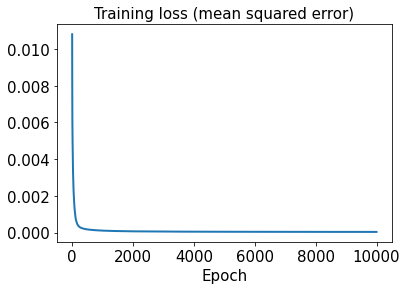

In [27]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

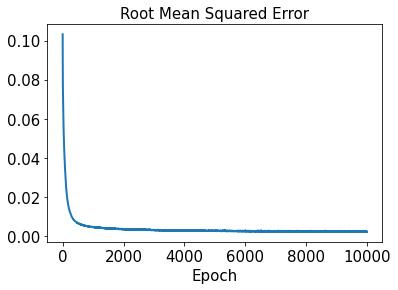

In [28]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [29]:
test_results = sd.evaluate(x_train)

29/29 [==============================] - 0s 1ms/step - loss: 2.9048e-05 - rmse: 0.0000e+00


In [30]:
decoded_train = sd.predict(x_train)

In [31]:
decoded_test = sd.predict(x_test)

In [32]:
error_train_abs = np.abs(decoded_train - y_train)

In [33]:
error_test_abs = np.abs(decoded_test - y_test)

In [34]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.00040465407


In [35]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.0023275088


In [36]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.0003903454, 0.0004449056, 0.0003573542, 0.00022208979, 0.0004400904, 0.00029865876, 0.00034337756, 0.00030867071, 0.000636031, 0.001056245, 0.00033378965, 0.00040853897, 0.00052860496, 0.0004679758, 0.0006928298, 0.00036139577, 0.00020149065, 0.00035443789, 0.00037062544, 0.0004807819, 0.00045556584, 0.00035062997, 0.0003195121, 0.0003319047, 0.00035571575, 0.00033396838, 0.00028877368, 0.00035972567, 0.00033948492, 0.00030815636, 0.00035805887, 0.000362865, 0.00041054894, 0.0004963325, 0.00024180287, 0.0002887031, 0.00033225454, 0.0002700771, 0.00035015892, 0.00018571694, 0.00034862605, 0.00022066271, 0.0004970757, 0.0005006478, 0.00019937036, 0.0003146773, 0.00028609385, 0.0003819007, 0.00067645864, 0.00029976908, 0.0002827536, 0.00029996957, 0.00033335708, 0.00025188294, 0.0003668673, 0.00025284447, 0.00033461105, 0.0003428191, 0.00056401023, 0.00028637543, 0.00034047375, 0.00064299745, 0.00072484114, 0.00033758016, 0.00026974463, 0.00039896756, 0.00069092255, 0.00048891536, 0.00

In [37]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.00226159, 0.0045209825, 0.0006015294, 0.0064964266, 0.00088677945, 0.0011340008, 0.00080951006, 0.013636464, 0.00071637175, 0.00070988736, 0.0027775597, 0.0015591609, 0.0011819424, 0.008580765, 0.0010697162, 0.0011138315, 0.004847595, 0.0015986826, 0.00095652346, 0.00085580634, 0.0008966084, 0.00042710372, 0.00038191926, 0.0005807793, 0.000489378, 0.0037885525, 0.00072602596, 0.00051973516, 0.011203733, 0.0010191221, 0.0030307046, 0.0007107467, 0.0027459327, 0.0014282023, 0.0054552057, 0.0014399509, 0.0011273113, 0.00040313578, 0.0011808842, 0.0007072629, 0.0022615343, 0.00075390295, 0.0037796358, 0.00075352186, 0.0014133191, 0.0009101995, 0.0019216998, 0.0007782515, 0.0003426166, 0.0018528186, 0.00058870285, 0.0013988967, 0.00061273563, 0.0008453148, 0.0019705077, 0.006103025, 0.0006256966, 0.00081212795, 0.0009607923, 0.0009559357, 0.0007175842, 0.0009970025, 0.0016818672, 0.0027045994, 0.0025318528, 0.0005369703, 0.0011124336, 0.000508167, 0.0009834616, 0.00070585177, 0.001014346

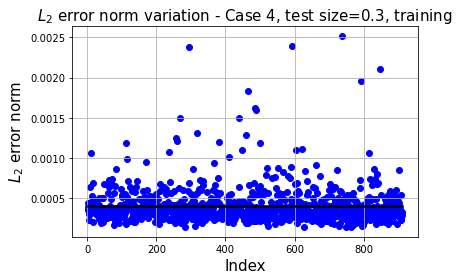

In [38]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - Case 4, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

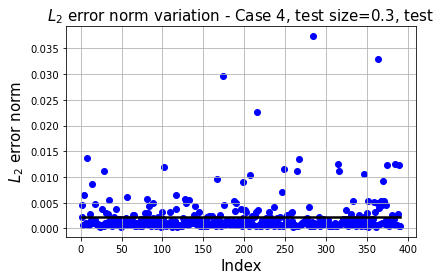

In [39]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - Case 4, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

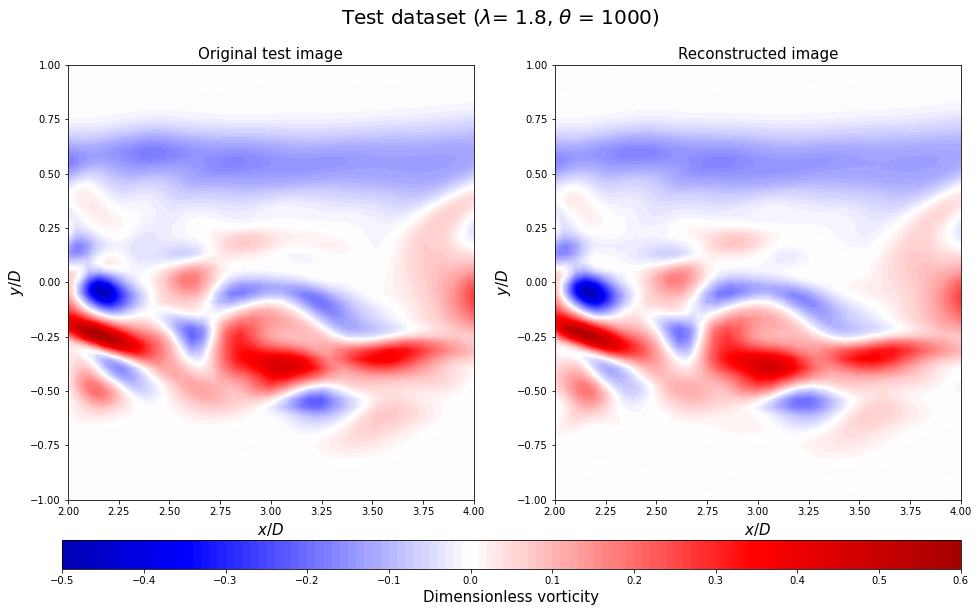

In [40]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

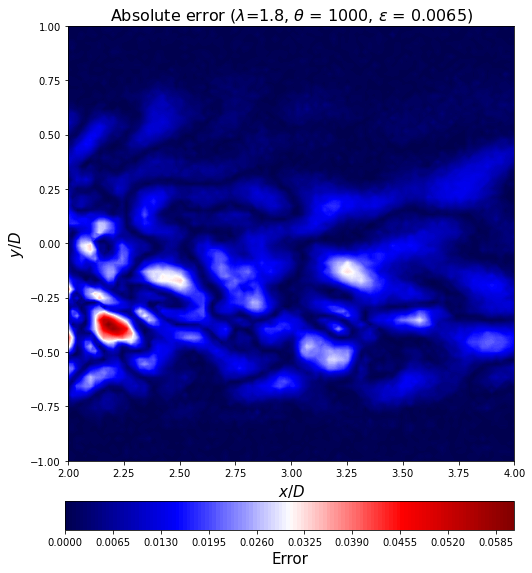

In [41]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()